In [26]:
using Plots
gr()

# Length of rod and diffusivity constants.
const L = 1.
const diff = 1.

function heat_eq(t, n; offset=1/2)
    # Grid spacing.
    h = L/(n-1)

    # FTCS coefficient.
    k = diff*t/h^2

    # Initial conditions; integrate to t=0.03 seconds.
    steps = Int(round(0.03/t))
    xi = Int(ceil(offset*n))
    temps = zeros(steps, n)
    
    cur = zeros(n)
    cur[n-xi] = 1.0/h

    # x- and time-values for plotting
    xvals = [-L/2 + h*i for i in 0:(n-1)]
    tvals = [t*i for i in 0:(steps-1)]
    
    # Dirichlet FTCS
    for i in 1:steps
        temps[i,:] = cur
        cur[2:end-1] += k*(cur[1:end-2] + cur[3:end] - 2*cur[2:end-1])
    end

    return (temps, xvals, tvals, n, t)
end

function plot_temps(dat, inc=0.1)
    temp, x, t, nstep, tstep = dat
    
    ttl = string("Diffusion of a delta spike for dt = ", string(tstep), " s, N = ", string(nstep))
    
    p1=surface(x, t, temp, title=ttl,
            xlabel="x", ylabel="time", zlabel="T(x,t)", 
            color=:Spectral_r, colorbar=false,
            st=:surface, camera=(45,45))
    
    p2=contour(x, t, temp, title="Temperature level curves",
            xlabel="x", ylabel="time", xticks=[i for i in -0.5:0.1:0.5],
            levels=[i^2 for i in 0.:inc:sqrt(maximum(temp))],
            color=:Spectral_r, colorbar=false,
            st=:contourf, contour_labels=true)
    
    plot(p1, p2, layout=2, size=(950,450))
end;

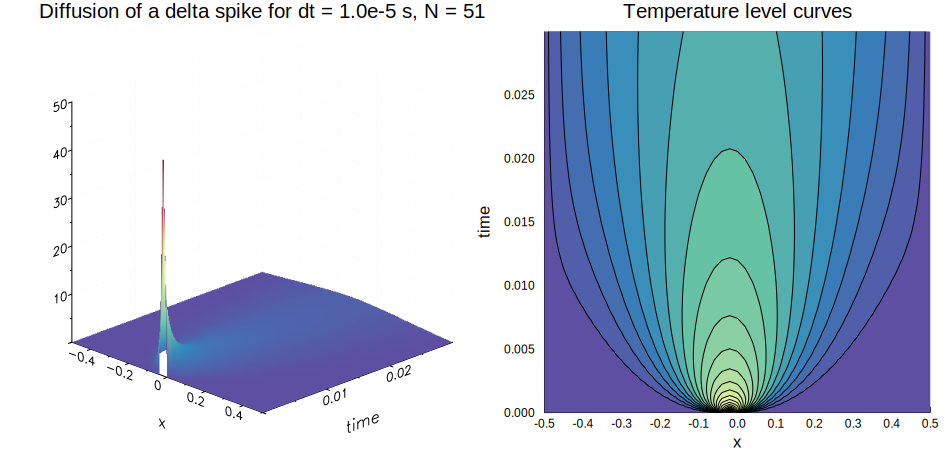

In [27]:
plot_temps(heat_eq(1e-5, 51), 0.2)